In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df['species'] = iris.target

df['species'] = df['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})


In [4]:
print("Dataset Information:\n")
df.info()  
print("\nFirst 5 Rows of the Dataset:\n")
df.head()

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

First 5 Rows of the Dataset:



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
df.loc[0, 'sepal length (cm)'] = np.nan  
df.loc[1, 'sepal width (cm)'] = np.nan  

imputer = SimpleImputer(strategy='mean')
df[['sepal length (cm)', 'sepal width (cm)']] = imputer.fit_transform(df[['sepal length (cm)', 'sepal width (cm)']])

print("\nData After Imputation:\n")
print(df[['sepal length (cm)', 'sepal width (cm)']])



Data After Imputation:

     sepal length (cm)  sepal width (cm)
0             5.848322          3.500000
1             4.900000          3.057718
2             4.700000          3.200000
3             4.600000          3.100000
4             5.000000          3.600000
..                 ...               ...
145           6.700000          3.000000
146           6.300000          2.500000
147           6.500000          3.000000
148           6.200000          3.400000
149           5.900000          3.000000

[150 rows x 2 columns]


In [6]:
df['species'] = df['species'].map({'Setosa': 0, 'Versicolor': 1, 'Virginica': 2})

print("\nData After Encoding Species:\n")
print(df[['species']].head())



Data After Encoding Species:

   species
0        0
1        0
2        0
3        0
4        0


In [8]:
scaler = StandardScaler()

numerical_cols = df.columns[:-1]  
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\nData After Standardization:\n")
df[numerical_cols].head()



Data After Standardization:



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,1.968779e-15,1.018178e+00,-1.340227,-1.315444
1,-1.152203e+00,2.163101e-15,-1.340227,-1.315444
2,-1.395201e+00,3.275474e-01,-1.397064,-1.315444
3,-1.516700e+00,9.733721e-02,-1.283389,-1.315444
4,-1.030704e+00,1.248388e+00,-1.340227,-1.315444


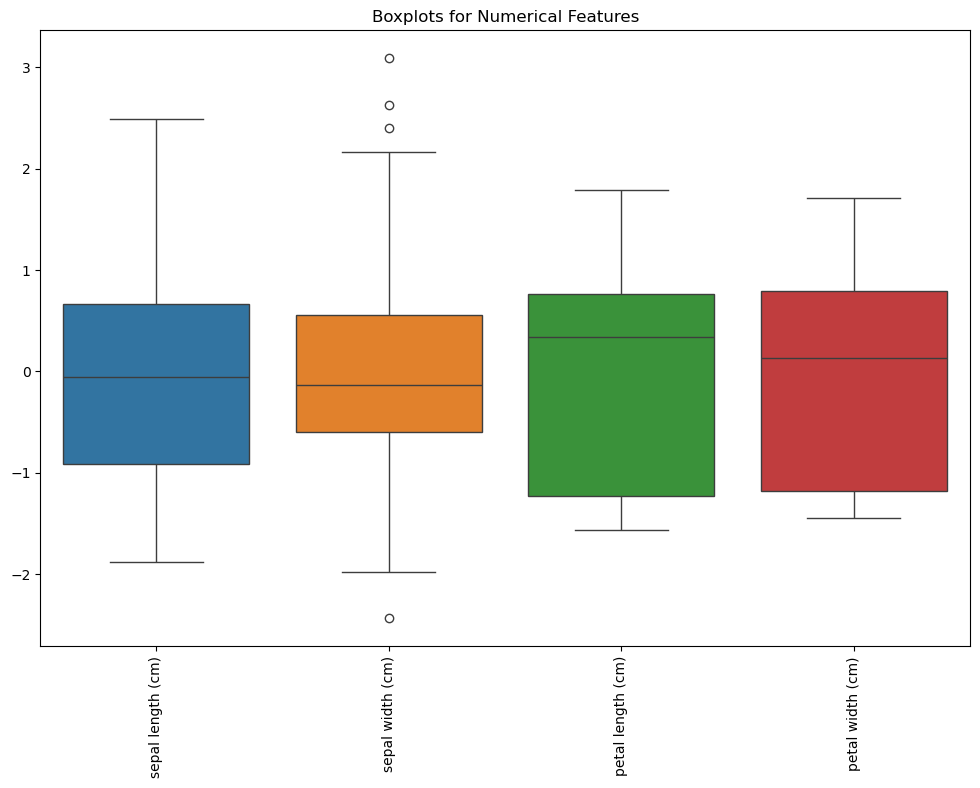


Data After Removing Outliers:



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,1.968779e-15,1.018178e+00,-1.340227,-1.315444
1,-1.152203e+00,2.163101e-15,-1.340227,-1.315444
2,-1.395201e+00,3.275474e-01,-1.397064,-1.315444
3,-1.516700e+00,9.733721e-02,-1.283389,-1.315444
4,-1.030704e+00,1.248388e+00,-1.340227,-1.315444


In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=90)
plt.title('Boxplots for Numerical Features')
plt.show()

Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nData After Removing Outliers:\n")
df_cleaned[numerical_cols].head()